# Create a model

In [1]:
import orsa
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

sns.set(style = 'white')
mpl.rc('xtick.minor', visible = True)
mpl.rc('ytick.minor', visible = True)
mpl.rc('xtick', direction='in', top=True, bottom = True)
mpl.rc('ytick', direction='in', right=True, left = True)

print(orsa.__version__)

0.7.1


In [2]:
model = orsa.model.Model([], np.arange(0.5, 12, 0.01), 0.8, 11, orsa.oscillation.default(), orsa.detector.default(), False, True, True, rebin = 1, exposure = 1)

model.add_parameter(orsa.model.DetectorParameter(label = 'eff', value = 1,          error = 0.01,   prior = {'positive': None},   formatted_label = r'$\epsilon$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'a',   value = 0.02614,    error = 0.0077, prior = {'positive': None},   formatted_label = r'$a$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'b',   value = 0.006401,   error = 0.012,  prior = {'positive': None},   formatted_label = r'$b$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'c',   value = 0.01205,    error = 0.033,  prior = {'positive': None},   formatted_label = r'$c$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'a0',  value = 0,          error = 1,      is_relative=False,            formatted_label = r'$a^{nl}_0$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'a1',  value = 0,          error = 1,      is_relative=False,            formatted_label = r'$a^{nl}_1$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'a2',  value = 0,          error = 1,      is_relative=False,            formatted_label = r'$a^{nl}_2$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'a3',  value = 0,          error = 1,      is_relative=False,            formatted_label = r'$a^{nl}_3$'))

model.add_parameter(orsa.model.OscillationParameter(label = 'rho',      value = 2.45,       error = 0.06,   prior = {'positive': None}, formatted_label = r'$\rho$'))
model.add_parameter(orsa.model.OscillationParameter(label = 'dm2_21',   value = 7.53e-5,    error = np.inf,                       formatted_label = r'$\Delta m^2_{21}$'))
model.add_parameter(orsa.model.OscillationParameter(label = 'dm2_31',   value = 2.5283e-3,  error = np.inf,                       formatted_label = r'$\Delta m^2_{31}$'))
model.add_parameter(orsa.model.OscillationParameter(label = 's2_12',    value = 0.307,      error = np.inf,                       formatted_label = r'$\sin^2 \theta_{12}$'))
model.add_parameter(orsa.model.OscillationParameter(label = 's2_13',    value = 0.0218,     error = np.inf,                       formatted_label = r'$\sin^2 \theta_{13}$'))

shape_fact = np.sqrt(36e-03/model.bin)
shape_fact_20 = np.sqrt(20e-03/model.bin)

gen_dict = dict()
gen_dict['rea'] = orsa.generator.sniper('reactors', True, shape_uncertainty='tao')
gen_dict['U'] = orsa.generator.geoneutrinos('238U', True, True, shape_uncertainty=0.05)
gen_dict['Th'] = orsa.generator.geoneutrinos('232Th', True, True, shape_uncertainty=0.05)
gen_dict['geo'] = orsa.generator.spe2gen(0.9*orsa.generator.geoneutrinos('238U', True, True).get_spectrum(model.E_eval) + 0.3*orsa.generator.geoneutrinos('232Th', True, True).get_spectrum(model.E_eval), shape_uncertainty=0.05)
gen_dict['lihe'] =  orsa.generator.sniper('lihe', True, shape_uncertainty=0.1)
gen_dict['acc'] =  orsa.generator.sniper('accidentals', True, shape_uncertainty=0)
gen_dict['fn'] = orsa.generator.common_inputs('FnBkgHistogramAD', orsa.spectrum.ReconstructedSpectrum, True, shape_uncertainty=0.2)
gen_dict['alpha'] = orsa.generator.common_inputs('AlphaNBkgHistogramAD',  orsa.spectrum.ReconstructedSpectrum, True, shape_uncertainty=0.5)
gen_dict['glob'] = orsa.generator.common_inputs('OtherReactorSpectrum_L300km',  orsa.spectrum.ReconstructedSpectrum, True, shape_uncertainty=0.05)
gen_dict['atm'] = orsa.generator.common_inputs('AtmosphericNeutrinoModelGENIE2',  orsa.spectrum.ReconstructedSpectrum, True, shape_uncertainty=0.5) 
gen_dict['snf'] = orsa.generator.common_inputs('SNF_VisibleSpectrum',  orsa.spectrum.UnoscillatedSpectrum, True, shape_uncertainty=0)  
gen_dict['noneq'] = orsa.generator.common_inputs('NonEq_VisibleSpectrum',  orsa.spectrum.UnoscillatedSpectrum, True, shape_uncertainty=0)

model.add_parameter(orsa.model.CoreParameter(label = 'YJ-C1', value = 1, error = 0.008, formatted_label = r'$R_\mathrm{YJ-C1}$', baseline = 52.74, power = 2.9))
model.add_parameter(orsa.model.CoreParameter(label = 'YJ-C2', value = 1, error = 0.008, formatted_label = r'$R_\mathrm{YJ-C2}$', baseline = 52.82, power = 2.9))
model.add_parameter(orsa.model.CoreParameter(label = 'YJ-C3', value = 1, error = 0.008, formatted_label = r'$R_\mathrm{YJ-C3}$', baseline = 52.41, power = 2.9))
model.add_parameter(orsa.model.CoreParameter(label = 'YJ-C4', value = 1, error = 0.008, formatted_label = r'$R_\mathrm{YJ-C4}$', baseline = 52.49, power = 2.9))
model.add_parameter(orsa.model.CoreParameter(label = 'YJ-C5', value = 1, error = 0.008, formatted_label = r'$R_\mathrm{YJ-C5}$', baseline = 52.11, power = 2.9))
model.add_parameter(orsa.model.CoreParameter(label = 'YJ-C6', value = 1, error = 0.008, formatted_label = r'$R_\mathrm{YJ-C6}$', baseline = 52.19, power = 2.9))
model.add_parameter(orsa.model.CoreParameter(label = 'TS-C1', value = 1, error = 0.008, formatted_label = r'$R_\mathrm{TS-C1}$', baseline = 52.77, power = 4.6))
model.add_parameter(orsa.model.CoreParameter(label = 'TS-C2', value = 1, error = 0.008, formatted_label = r'$R_\mathrm{TS-C2}$', baseline = 52.64, power = 4.6))
model.add_parameter(orsa.model.CoreParameter(label = 'DYB-C', value = 1, error = 0.008, formatted_label = r'$R_\mathrm{DYB-C}$', baseline = 215.00, power = 17.4))

model.add_parameter(orsa.model.NormalizationParameter(label = 'rea',   value = 47.1,    generator = gen_dict['rea'],     error = 0.02,     is_oscillated=True, has_duty=True,      formatted_label = r'$N_\mathrm{rea}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'U',     value = 0.9,     generator = gen_dict['U'],       error = np.inf,                                           formatted_label = r'$N_\mathrm{U}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'Th',    value = 0.3,     generator = gen_dict['Th'],      error = np.inf,                                           formatted_label = r'$N_\mathrm{Th}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'acc',   value = 0.8,     generator = gen_dict['acc'],     error = 0.01,                                             formatted_label = r'$N_\mathrm{acc}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'lihe',  value = 0.8,     generator = gen_dict['lihe'],    error = 0.2,                                              formatted_label = r'$N_\mathrm{Li/He}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'fn',    value = 0.1,     generator = gen_dict['fn'],      error = 1.,                                               formatted_label = r'$N_\mathrm{fn}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'alpha', value = 0.05,    generator = gen_dict['alpha'],   error = 0.5,                                              formatted_label = r'$N_\mathrm{\alpha}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'glob',  value = 1.0,     generator = gen_dict['glob'],    error = 0.02,                                             formatted_label = r'$N_\mathrm{glob}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'atm',   value = 0.16,    generator = gen_dict['atm'],     error = 0.5,                                              formatted_label = r'$N_\mathrm{atm}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'snf',   value = 0.14,    generator = gen_dict['snf'],     error = 0.3,      is_oscillated=True, has_duty=False,     formatted_label = r'$N_\mathrm{SNF}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'noneq', value = 0.28,    generator = gen_dict['noneq'],   error = 0.3,      is_oscillated=True, has_duty=True,      formatted_label = r'$N_\mathrm{noneq}$'))

model.exposure = 6*365.25

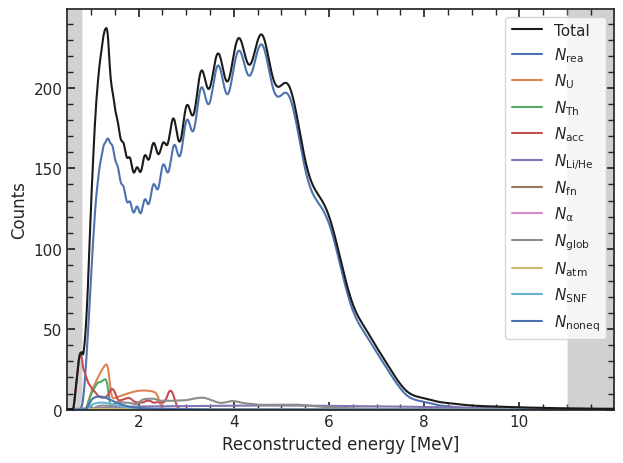

In [3]:
model # use model.to_json(filename) to store it to file

In [4]:
model.to_dict()

{'E_eval': {'E_min': 0.5, 'E_max': 12.0, 'E_bin': 0.01},
 'E_fit_max': 11,
 'E_fit_min': 0.8,
 'detector': {'resolution': {'a': 0.02614, 'b': 0.006401, 'c': 0.01205},
  'non_linearity': {'model': 'common_input',
   'anchor': 3.5185,
   'p0': 0.967334113649631,
   'p1': 0.06685436244184337,
   'p2': 0.5093332269010721,
   'p3': -0.13176400316242642,
   'a0': 0.0,
   'a1': 0.0,
   'a2': 0.0,
   'a3': 0.0,
   'kB1': 4.5274222054926785,
   'kB2': 0.0017343904821671902},
  'cross_section': {'which': 'sv', 'recoil': True, 'smearing': False},
  'efficiency': 1.0},
 'duty_cycle': 0.9166666666666666,
 'exposure': 2191.5,
 'oscillation': {'oscillationParams': {'ordering': 'NO',
   's2_12': 0.307,
   'dm2_21': 7.53e-05,
   's2_13_N': 0.0218,
   'dm2_31_N': 0.0025283,
   's2_13_I': 0.0224,
   'dm2_32_I': -0.002512,
   'source': 'NuFIT 2022'},
  'matter_effect': {'matter_density': 2.45,
   'abs_sigma': 0.15,
   'rel_sigma': 0.06},
  'baseline': 52.5},
 'rebin': 1,
 'split_cores': True,
 'use_gpu': 